# Some theoretical simulations

This notebook is used to generate some theoretical curves for the paper.

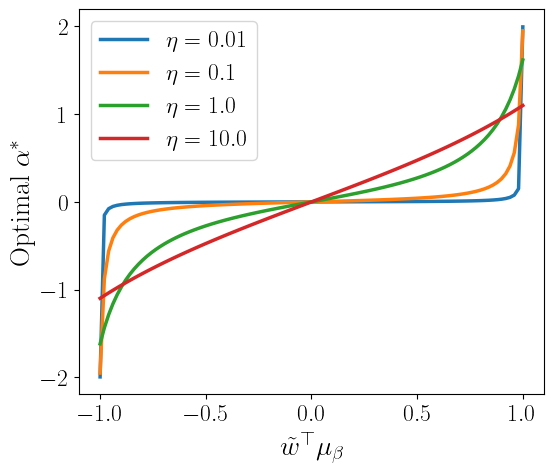

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})
# Parameters
n = 200
#p = 400
gamma = 1

def alphas(x, n, p, gamma):
    # x is the dot product between x_tilde and vmu_beta, but assumed to be of norm 1, so x is in [-1, 1]
    eta = p / n
    delta = (eta - gamma - 1 + np.sqrt((eta - gamma - 1)**2 + 4*eta*gamma)) / (2 * gamma)
    lam_Q = 2 + gamma * (1 + delta)

    denom = gamma * (1 + delta) * (lam_Q - (lam_Q - eta) * x**2)
    alpha_max = eta * (1 + gamma * (1 + delta)) * x / denom
    alpha_min = - 1 / (gamma * (1 + delta) * x)
    return alpha_max, alpha_min

linewidth = 2.5
fontsize = 20
labelsize = 17

fig, ax = plt.subplots(figsize = (6, 5))
ps = [2, 20, 200, 2000]
x = np.linspace(-1, 1, 100)
for p in ps:
    alphas_max, alphas_min = alphas(x, n, p, gamma)
    ax.plot(x, alphas_max, label = f'$\eta = {p / n}$', linewidth = linewidth)
    
ax.legend(fontsize = labelsize)
ax.set_xlabel('$\\tilde w^\\top \mu_\\beta$', fontsize = fontsize)
ax.set_ylabel('Optimal $\\alpha^*$', fontsize = fontsize)
ax.tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax.tick_params(axis = 'y', which = 'both', labelsize = labelsize)
path = './results-plot' + f'/optimal-alpha-arbitrary-n-{n}-gamma-{gamma}.pdf'
fig.savefig(path, bbox_inches='tight')
plt.show()


### $\alpha^*$ with the regularization $\gamma$

/var/folders/md/73tlwn611t99m1h0qypsxykc0000gn/T/ipykernel_72871/3327878152.py:16: RuntimeWarning: divide by zero encountered in divide
  alpha_min = - 1 / (gamma * (1 + delta) * x)


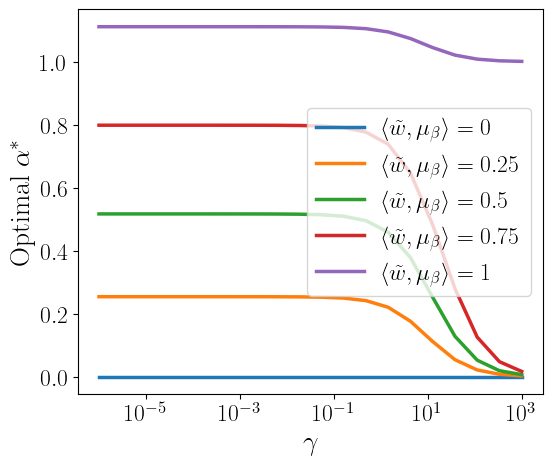

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})
# Parameters
n = 40
p = 400

def alphas(x, n, p, gamma):
    # x is the dot product between x_tilde and vmu_beta, but assumed to be of norm 1, so x is in [-1, 1]
    eta = p / n
    delta = (eta - gamma - 1 + np.sqrt((eta - gamma - 1)**2 + 4*eta*gamma)) / (2 * gamma)
    lam_Q = 2 + gamma * (1 + delta)

    denom = gamma * (1 + delta) * (lam_Q - (lam_Q - eta) * x**2)
    alpha_max = eta * (1 + gamma * (1 + delta)) * x / denom
    alpha_min = - 1 / (gamma * (1 + delta) * x)
    return alpha_max, alpha_min

linewidth = 2.5
fontsize = 20
labelsize = 17

fig, ax = plt.subplots(figsize = (6, 5))
gammas = np.logspace(-6, 3, 20)
scs = [0, 0.25, 0.5, 0.75, 1]
for x in scs:
    alphas_max, alphas_min = alphas(x, n, p, gammas)
    ax.semilogx(gammas, alphas_max, label = f'$\langle \\tilde w, \mu_\\beta \\rangle = {x}$', linewidth = linewidth)
    
ax.legend(fontsize = labelsize)
ax.set_xlabel('$\gamma$', fontsize = fontsize)
ax.set_ylabel('Optimal $\\alpha^*$', fontsize = fontsize)
ax.tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax.tick_params(axis = 'y', which = 'both', labelsize = labelsize)
#path = './results-plot' + f'/optimal-alpha-arbitrary-n-{n}.pdf'
#fig.savefig(path, bbox_inches='tight')
plt.show()


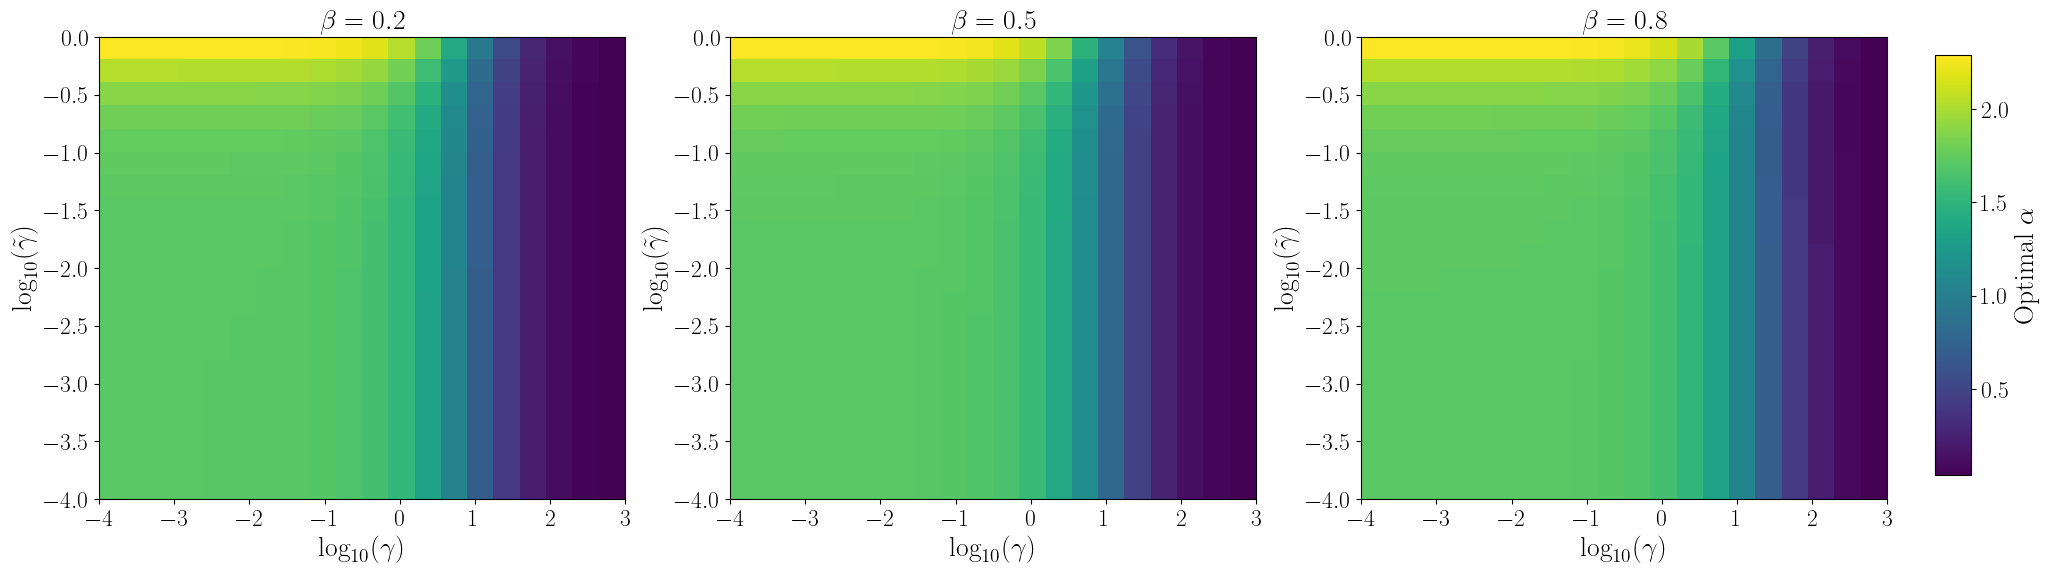

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rmt_results import optimal_alphas

plt.rcParams.update({"text.usetex": True, "font.family": "STIXGeneral"})

# Parameters
N = 2000
n = 40
p = 400

linewidth = 2.5
fontsize = 20
labelsize = 17

fig, ax = plt.subplots(1, 3, figsize=(24, 6))
gammas_pre = np.logspace(-4, 0, 20)
gammas_ft = np.logspace(-4, 3, 20)

betas = [0.2, 0.5, 0.8]

for k, beta in enumerate(betas):
    alpha_matrix = np.zeros((len(gammas_pre), len(gammas_ft)))
    for i, gamma_pre in enumerate(gammas_pre):
        for j, gamma_ft in enumerate(gammas_ft):
            alpha_matrix[i, j] = optimal_alphas(N, n, p, 1, 1, beta, gamma_pre, gamma_ft)[0]

    im = ax[k].imshow(alpha_matrix, 
                      extent=[np.log10(gammas_ft[0]), np.log10(gammas_ft[-1]), 
                              np.log10(gammas_pre[0]), np.log10(gammas_pre[-1])],
                      origin='lower', 
                      aspect='auto', 
                      cmap='viridis')

    ax[k].set_xlabel(r'$\log_{10}(\gamma)$', fontsize=fontsize)
    ax[k].set_ylabel(r'$\log_{10}(\tilde \gamma)$', fontsize=fontsize)
    ax[k].set_title(fr'$\beta = {beta}$', fontsize=fontsize)
    ax[k].tick_params(labelsize=labelsize)

# Reserve space on the right and add colorbar
fig.subplots_adjust(right=0.87)  # Leave room on right
cbar_ax = fig.add_axes([0.89, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r'Optimal $\alpha$', fontsize=fontsize)
cbar.ax.tick_params(labelsize=labelsize)

plt.show()


-----